# 13.0 О чём этот модуль
### О чём этот модуль
Вы уже умеете делать много полезных трюков с данными, представленными в CSV-формате. Наверняка многие из этих трюков вы уже пробовали применить для решения реальных задач, и, скорее всего, это неплохо у вас получилось. Тем не менее нет предела совершенству.

В реальной практике далеко не все данные, которые мы получаем для работы, упакованы в структурированные, готовые к обработке в библиотеке Pandas CSV-файлы. Данные могут поступать к нам в разных форматах: это и таблицы Excel со сложной и не всегда логичной структурой, и загруженные из интернета файлы в формате JSON и XML, которые имеют далеко не табличную структуру.

Для работы с такими данными нужно не только понимать особенности их структуры, но и уметь использовать специальные инструменты: библиотеки, функции и методы. Всем этим мы и займёмся в данном модуле.

### Чему я научусь в этом модуле?
В этом модуле мы будем учиться работать с тремя форматами данных, с которыми, помимо CSV, чаще всего приходится иметь дело аналитику: Excel, JSON и XML. Вы научитесь:

- открывать файлы указанных форматов;
- анализировать структуру данных и разрабатывать план работы с данными в зависимости от их структуры;
- преобразовывать данные из одного формата в другой и создавать Pandas DataFrame на основе данных указанных форматов;
- создавать файлы форматов Excel, JSON и XML.

### Полезные ссылки
В этом модуле мы будем работать с новыми библиотеками, поэтому будет полезным иметь под рукой ссылки на документацию этих библиотек:

Модуль JSON (https://docs.python.org/3/library/json.html) стандартной библиотеки Python.  
Метод read_excel (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html) библиотеки Pandas.  
Модуль xml.etree.ElementTree (https://docs.python.org/3.7/library/xml.etree.elementtree.html) стандартной библиотеки Python.

# 13.1 Формат JSON
### Что такое JSON и зачем он нужен?
Аббревиатура JSON расшифровывается как JavaScript Object Notation или, в вольном переводе, система обозначения (или записи) объектов JavaScript. 

Несмотря на то,  что JSON является подмножеством языка программирования JavaScript, сейчас это общепризнанный формат обмена данными, и многие языки программирования, включая Python, содержат эффективные инструменты для работы с этим форматом.

### Важно! JSON — это простой, структурированный, основанный на использовании текста формат обмена данными.

Когда мы говорим об обмене данными, то чаще всего имеем в виду передачу данных по компьютерным сетям, например, пересылку данных от сервера к браузеру. Если вы планируете использовать в своей работе информацию, которая автоматически загружается из каких-либо веб-служб, то умение работать с форматом JSON — это критически важный навык, который обязательно необходимо приобрести. Именно этим мы сейчас и займёмся.

### Инструменты для работы с JSON
Для работы с данными в формате JSON в Python используется библиотека json, которую необходимо будет загрузить в начале работы. Также нам может быть полезен модуль pprint (именно так, с двумя "р" в начале) и встроенная в него функция pprint, с помощью которой можно красиво выводить на экран структурированные данные.

Итак, если в своем коде вы планируете работать с данными в JSON-формате, то необходимо включить в программу эти два импорта:

In [1]:
import json  
from pprint import pprint

# Как выглядит JSON?
Информация в формате JSON представляет собой (в закодированном виде) одну из двух структур:

- набор пар "ключ-значение", причём ключ — это всегда строковая величина; в Python такая структура преобразуется в словарь;
- упорядоченный набор значений; при чтении JSON в Python эта структура будет преобразована в список.

Формат JSON допускает неограниченное количество вложений этих структур друг в друга. Давайте посмотрим, как могут выглядеть эти структуры. 

Все упражнения раздела мы будем выполнять на примере файла, содержащего информацию об ингредиентах блюд, относящихся к кухням разных народов. Мы будем работать с сокращенной версией файла, скачать которую можно здесь (https://lms.skillfactory.ru/assets/courseware/v1/92fd198fd3eccc09a8c3498e9dd25588/asset-v1:Skillfactory+DST-WEEKLY-2.0+08JULY2020+type@asset+block/recipes.json). Полный датасет, содержащий более 30 000 видов блюд, можно скачать здесь (https://www.kaggle.com/c/whats-cooking/data) (требуется регистрация). 

### Смотрим на данные
Чтобы перевести данные из формата JSON в формат, который можно обрабатывать на Python, необходимо выполнить процедуру, которая называется десериализация (иными словами, декодирование данных). Обратный процесс, связанный с переводом структур данных Python в формат JSON, называется сериализация.

Для выполнения десериализации мы воспользуемся методом load модуля json. В качестве параметра укажем ссылку на файл:

In [2]:
with open('recipes.json') as f:
    recipes = json.load(f)

Чтобы разобраться в структуре данных, давайте выведем их на экран с помощью функции pprint. Будьте готовы к тому, что данных в наборе много, поэтому в ячейке Out появится несколько сот строк. Нам не нужно будет просматривать все строки. Главное — понять общую структуру объекта recipes:

In [3]:
pprint(recipes)

[{'cuisine': 'greek',
  'id': 10259,
  'ingredients': ['romaine lettuce',
                  'black olives',
                  'grape tomatoes',
                  'garlic',
                  'pepper',
                  'purple onion',
                  'seasoning',
                  'garbanzo beans',
                  'feta cheese crumbles']},
 {'cuisine': 'southern_us',
  'id': 25693,
  'ingredients': ['plain flour',
                  'ground pepper',
                  'salt',
                  'tomatoes',
                  'ground black pepper',
                  'thyme',
                  'eggs',
                  'green tomatoes',
                  'yellow corn meal',
                  'milk',
                  'vegetable oil']},
 {'cuisine': 'filipino',
  'id': 20130,
  'ingredients': ['eggs',
                  'pepper',
                  'salt',
                  'mayonaise',
                  'cooking oil',
                  'green chilies',
                  'grilled chicken bre

                  'watercress']},
 {'cuisine': 'indian',
  'id': 14874,
  'ingredients': ['fenugreek leaves',
                  'olive oil',
                  'garlic',
                  'black mustard seeds',
                  'ground cumin',
                  'amchur',
                  'lime wedges',
                  'scallions',
                  'coriander',
                  'sugar',
                  'fingerling potatoes',
                  'green chilies',
                  'chopped cilantro',
                  'tumeric',
                  'fresh ginger root',
                  'salt',
                  'ramps']},
 {'cuisine': 'indian',
  'id': 43399,
  'ingredients': ['black peppercorns',
                  'cinnamon sticks',
                  'cardamom pods',
                  'cumin seed',
                  'coriander seeds']},
 {'cuisine': 'italian',
  'id': 38254,
  'ingredients': ['spinach',
                  'asiago',
                  'whole wheat pasta',
              

  'ingredients': ['water',
                  'chili powder',
                  'oil',
                  'stuffing',
                  'salt',
                  'ghee',
                  'coriander powder',
                  'maida flour',
                  'ground cardamom',
                  'sugar',
                  'baking powder',
                  'cumin seed',
                  'frozen peas']},
 {'cuisine': 'mexican',
  'id': 47427,
  'ingredients': ['pepper',
                  'pita bread rounds',
                  'red bell pepper',
                  'olive oil',
                  'garlic',
                  'tomatoes',
                  'eggplant',
                  'salt',
                  'lime',
                  'butter',
                  'chopped cilantro fresh']},
 {'cuisine': 'french',
  'id': 40064,
  'ingredients': ['pepper',
                  'grated GruyГЁre cheese',
                  'heavy cream',
                  'salt',
                  'potatoes']},
 {'cui

 {'cuisine': 'southern_us',
  'id': 20123,
  'ingredients': ['salt',
                  'pecan pie',
                  'sweetened condensed milk',
                  'chocolate morsels',
                  'vanilla extract']},
 {'cuisine': 'mexican',
  'id': 22712,
  'ingredients': ['olive oil',
                  'scallions',
                  'chili powder',
                  'ground pepper',
                  'fresh lime juice',
                  'black beans',
                  'coarse salt']},
 {'cuisine': 'mexican',
  'id': 31428,
  'ingredients': ['tostada shells',
                  'jalapeno chilies',
                  'grouper',
                  'chopped cilantro fresh',
                  'low-fat sour cream',
                  'olive oil',
                  'chili powder',
                  'fresh lime juice',
                  'sliced green onions',
                  'corn kernels',
                  'cooking spray',
                  'red bell pepper',
                  'plum 

 {'cuisine': 'mexican',
  'id': 1667,
  'ingredients': ['Old El Pasoв„ў mild red enchilada sauce',
                  'Pillsburyв„ў Refrigerated Crescent Dinner Rolls',
                  'Mexican cheese blend',
                  'cooked chicken',
                  'refrigerated crescent rolls',
                  'red enchilada sauce',
                  'cooked chicken',
                  'Mexican cheese blend']},
 {'cuisine': 'mexican',
  'id': 48571,
  'ingredients': ['jumbo shrimp',
                  'sea scallops',
                  'grate lime peel',
                  'olive oil',
                  'chopped onion',
                  'chopped cilantro',
                  'bottled clam juice',
                  'white hominy',
                  'sun-dried tomatoes in oil',
                  'salsa verde',
                  'garlic cloves']},
 {'cuisine': 'mexican',
  'id': 10074,
  'ingredients': ['baking powder',
                  'salt',
                  'vegetable oil',
          

 {'cuisine': 'mexican',
  'id': 27204,
  'ingredients': ['canned black beans',
                  'bell pepper',
                  'diced tomatoes',
                  'long-grain rice',
                  'diced onions',
                  'lime',
                  'spices',
                  'salt',
                  'canned corn',
                  'lettuce',
                  'water',
                  'boneless skinless chicken breasts',
                  'cilantro',
                  'sour cream',
                  'tomato paste',
                  'olive oil',
                  'butter',
                  'scallions']},
 {'cuisine': 'italian',
  'id': 8304,
  'ingredients': ['aged gouda', 'soppressata']},
 {'cuisine': 'italian',
  'id': 28063,
  'ingredients': ['tomato paste',
                  'pepper',
                  'dry white wine',
                  'garlic cloves',
                  'boiling water',
                  'black pepper',
                  'grated parmesan cheese

Итак, мы видим, что рецепт каждого блюда описан в виде словаря, состоящего из трёх пар "ключ-значение". Ключ "cuisine" обозначает принадлежность блюда к определённой кухне, "id" — это уникальный идентификационный номер блюда, а ключ "ingredients" содержит перечень продуктов, входящих в состав блюда.

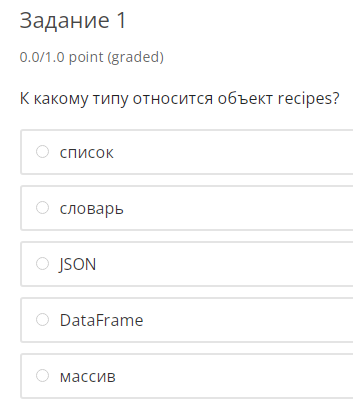

In [4]:
print(type(recipes))

<class 'list'>


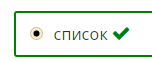

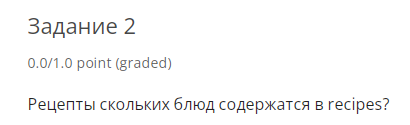

In [5]:
print(len(recipes))

500


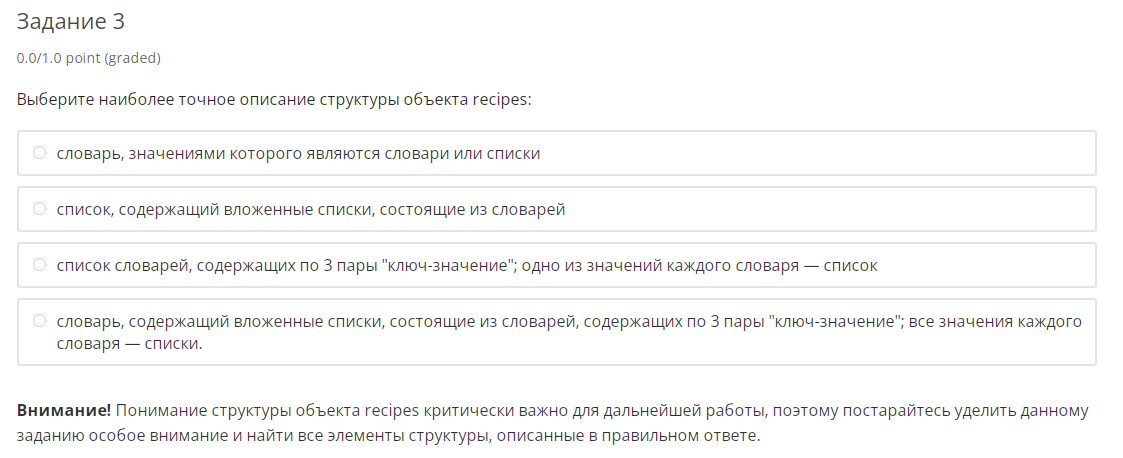

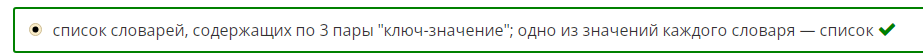

# 13.2 Извлекаем данные из JSON
### Извлекаем единичные данные
После того как мы провели десериализацию данных из JSON-файла, мы можем работать с полученным объектом, как с обычным словарём, или, как в случае с нашими данными, списком. Единственное отличие этой работы от манипуляций с привычными нам списками и словарями заключается в том, что данных теперь больше и они помещены внутрь структуры с большим количеством уровней вложенности. Тем не менее общие приёмы работы остаются стандартными.

Давайте выясним некоторые детали о блюде, которое записано первым в списке. Например, чтобы узнать ID этого блюда, мы можем использовать такой код:

In [6]:
recipes[0]['id']

10259

В данном случае сначала мы извлекаем из списка первый элемент (индекс 0). Поскольку каждый элемент списка является словарём, для получения нужной информации о конкретном блюде нам нужно указать ключ словаря. ID блюда доступно по ключу 'id', и мы указываем этот ключ в отдельной паре квадратных скобок:
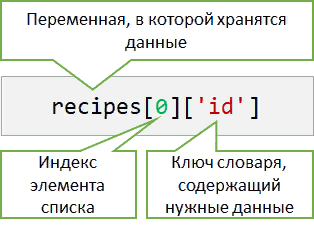

Для получения списка ингредиентов первого блюда в списке мы можем использовать тот же код, заменив в нём ключ 'id' на 'ingredients':

In [7]:
recipes[0]['ingredients']

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

Ещё один пример касается извлечения информации о конкретном блюде. Давайте попробуем найти информацию о том, к какой кухне относится блюдо с id = 13121. Сложность задачи заключается в том, что все id хранятся в словарях, которые являются элементами списка. Для получения данных о нужном блюде нам придётся перебрать все элементы списка, проверить их id, и при обнаружении совпадения извлечь нужную информацию:

In [8]:
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['id'] == 13121:  # если id текущего рецепта равен искомому
        print(recipe['cuisine'])  # выводим на экран кухню, к которой относится блюдо
        break   # и прерываем цикл, т.к. нужное блюдо уже найдено

thai


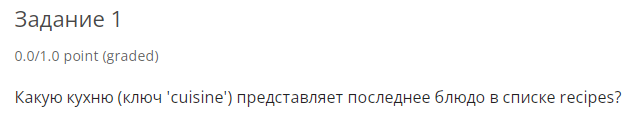

In [9]:
print(recipes[-1]['cuisine'])

british


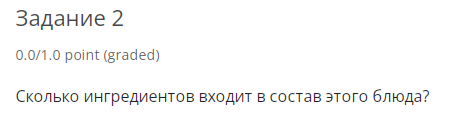

In [10]:
print(len(recipes[-1]['ingredients']))

17


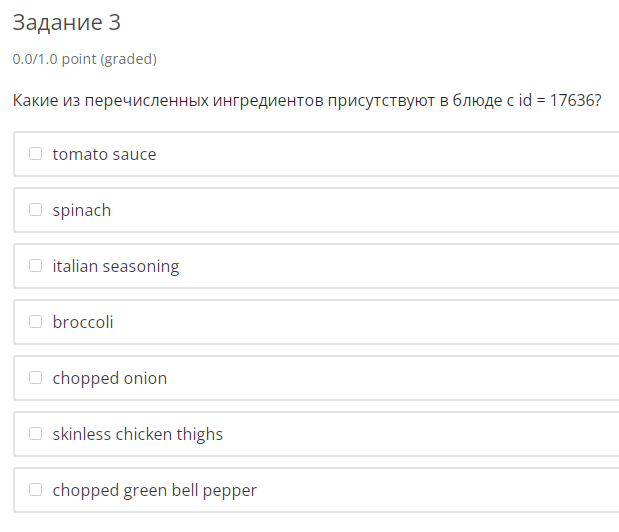

In [11]:
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['id'] ==  17636:  # если id текущего рецепта равен искомому
        lst = recipe['ingredients']  # выводим на экран кухню, к которой относится блюдо
        break   # и прерываем цикл, т.к. нужное блюдо уже найдено
for l in ['tomato sauce', 'spinach', 'italian seasoning', 'broccoli', 'chopped onion', 
          'skinless chicken thighs', 'chopped green bell pepper']:
    if l in lst:
        print(l)

tomato sauce
spinach
italian seasoning
chopped onion
chopped green bell pepper


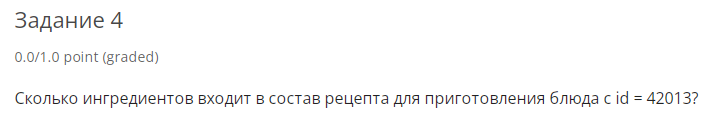

In [12]:
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['id'] ==  42013:  # если id текущего рецепта равен искомому
        print(len(recipe['ingredients']))  # выводим на экран кухню, к которой относится блюдо
        break   # и прерываем цикл, т.к. нужное блюдо уже найдено

14


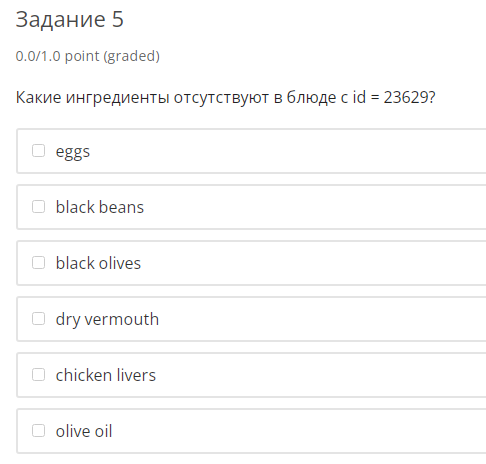

In [13]:
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['id'] ==  23629:  # если id текущего рецепта равен искомому
        lst = recipe['ingredients']  # выводим на экран кухню, к которой относится блюдо
        break   # и прерываем цикл, т.к. нужное блюдо уже найдено
for l in ['eggs', 'black beans', 'black olives', 'dry vermouth', 'chicken livers', 'olive oil']:
    if l not in lst:
        print(l)

dry vermouth
chicken livers
olive oil


# 13.3 Группировка данных
### Группируем данные
К объектам JSON, в том числе после их десериализации, невозможно применить методы группировки, доступные при работе с датафреймами Pandas. Однако задачи по извлечению из JSON-файла обобщённой информации периодически возникают, и нам нужно понять, как их решать. Давайте рассмотрим всё на нескольких примерах.

### Кейс №1: Какое количество кухонь представлено в наборе данных?
Итак, давайте попробуем проанализировать, кухни скольких народов мира присутствуют в нашем наборе данных. Напоминаем, что информация о типе кухни доступна по ключу 'cuisine'.

Чтобы извлечь эту информацию, нам нужно создать пустой список и последовательно заполнять его уникальными значениями, доступными по ключу 'cuisine' в каждом из словарей, содержащих информацию о рецептах. Поскольку словари объединены в список recipes, у нас не получится применить известный нам метод unique() (этот метод не применим к словарям), и для извлечения всех уникальных значений нужно перебирать элементы списка в цикле с параметром. Вот пример кода, с помощью которого это можно сделать:

In [14]:
cuisines = []  # создаём пустой список для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    if not(recipe['cuisine'] in cuisines):  # если тип кухни текущего блюда ещё не встречался
        cuisines.append(recipe['cuisine']) # добавляем его к списку cuisines
len(cuisines)

20

Другой способ решения этой же задачи — использование для хранения данных о разных кухнях не списка, а новой для вас конструкции — множества (set)(https://python-scripts.com/sets). Множества содержат только уникальные элементы, поэтому при работе с ним нет необходимости проверять, содержится ли там тот или иной элемент. Если элемент (в нашем примере — название типа кухни) уже есть, то команда добавить в множество такое же значение будет проигнорирована компьютером:

In [15]:
cuisines = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    cuisines.add(recipe['cuisine']) # добавляем название типа кухни к множеству
len(cuisines)

20

# Задание 1
Сколько ингредиентов включено в состав всех блюд, описанных в наборе данных?  
Подсказка: Обратите внимание, что для добавления в список или множество нового ингредиента вам нужно будет организовать перебор ингредиентов каждого блюда в отдельном вложенном цикле.

In [16]:
ingredients = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    for ingredient in recipe['ingredients']:
        ingredients.add(ingredient)  # добавляем название типа кухни к множеству
len(ingredients)

1318

# Задание 2
Сколько ингредиентов встречается в рецептах блюд итальянской кухни ('cuisine' = italian)?

In [17]:
ingredients = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['cuisine'] == 'italian':
        for ingredient in recipe['ingredients']:
            ingredients.add(ingredient)  # добавляем название типа кухни к множеству
len(ingredients)

406

# Задание 3
Какие ингредиенты не встречаются в рецептах блюд русской кухни ('cuisine' = 'russian')?
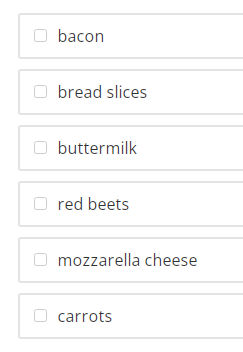

In [18]:
ingredients = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    if recipe['cuisine'] == 'russian':
        for ingredient in recipe['ingredients']:
            ingredients.add(ingredient)  # добавляем название типа кухни к множеству
for i in ['bacon', 'bread' 'slices', 'buttermilk', 'red beets', 'mozzarella cheese', 'carrots']:
    if i not in ingredients:
        print(i)

bacon
breadslices
carrots


### Кейс №2: Оцениваем популярность ингредиентов
Давайте представим, что мы хотим заняться торговлей продуктами для ресторанов национальной кухни. Нам необходимо оценить, какие продукты используются в приготовлении блюд чаще, а какие — реже. Давайте попробуем решить эту задачу с использованием имеющегося у нас набора данных.

### Эту задачу можно решить двумя способами:

1. Преобразовать JSON-структуру в датафрейм и найти количество ненулевых значений для каждого ингредиента. Этот способ мы подробнее рассмотрим в следующем шаге.
2. Создать словарь, в котором ключами будут являться названия ингредиентов, а значениями — количество рецептов, в которых встречается каждый ингредиент. Этот способ мы рассмотрим прямо сейчас.

Для создания словаря нам понадобится список или множество, содержащие перечень всех ингредиентов из описанных в наборе данных рецептов. Такой список вы составили при решении задачи в предыдущем уроке. Воспользуйтесь вашим кодом для решения этой задачи ещё раз, но при этом назовите список (или множество, это не будет иметь значения в коде, который мы собираемся создавать) именем ingredients.

### План решения задачи:
1. Для хранения информации о частоте встречаемости ингредиентов мы создадим пустой словарь food.
2. Заполним словарь food ключами, соответствующими названиями ингредиентов. В качестве значений по каждому ключу установим 0.
3. Организуем вложенный цикл, в котором будем перебирать рецепты (внешний цикл) и ингредиенты, использующиеся в каждом рецепте (внутренний цикл). При каждом появлении очередного ингредиента мы будем увеличивать значение соответствующего элемента словаря food на единицу.

Вот как будут выглядеть те же действия в виде кода на Python:

In [19]:
ingredients = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    for ingredient in recipe['ingredients']:
        ingredients.add(ingredient)  # добавляем название типа кухни к множеству

food = {}  # создаём пустой словарь для хранения информации об ингредиентах
for item in ingredients:  # перебираем список ингредиентов
    food[item] = 0 # добавляем в словарь ключ, соответствующий очередному ингредиенту
for recipe in recipes:   # перебираем список рецептов
    for item in recipe['ingredients']:   # и список ингредиентов в каждом рецепте
        food[item] += 1   # увеличиваем значение нужного ключа в словаре на 1

Теперь мы можем обращаться к словарю food по ключам и получать информацию о количестве рецептов, включающих тот или иной ингредиент:

In [20]:
print(food['sugar'])

print(food['eggs'])

81
43


# Задание 4
Какие ингредиенты входят в состав более чем 20% блюд, представленных в наборе данных?

Подсказка: Напоминаем, что весь набор данных содержит сведения о 500 блюдах.
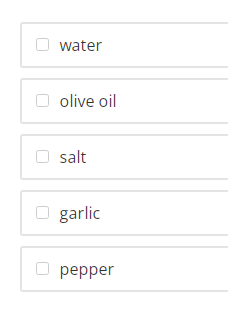

In [21]:
for index, value in food.items():
    if value > 100:
        print(index, value)

salt 217
garlic 107


# Задание 5
Какой ингредиент чаще всего встречается в составе блюд?

In [22]:
max_count = ['', 0]
for i in food:
    if food[i] > max_count[1]:
        max_count = [i, food[i]]
print(max_count)

['salt', 217]


# Задание 6
Сколько ингредиентов входит в состав только одного блюда?

In [23]:
ing = []
for index, value in food.items():
    if value == 1:
        ing.append(index)
print(len(ing))

684


# 13.4 Создание датафрейма на основе JSON-файла
### Pandas + JSON = ...
В предыдущих блоках нам удавалось извлекать из набора данных единичные показатели, но для полноценного анализа данных этого часто бывает недостаточно. Для решения многих задач нужна возможность работать с данными в форме таблицы и обозревать всю таблицу целиком. Например, набор данных, с фрагментом которого мы работаем в этом разделе модуля,  —  это материал для задачи по машинному обучению, определяющий по набору ингредиентов  тип кухни, к которой относится рецепт. Для решения этой и подобных задач необходимо перевести данные и в табличную форму и удобнее всего  использовать библиотеку Pandas.

Как вы помните, после десериализации наши данные были преобразованы в список, элементами которого являются вложенные словари, содержащие по три пары "ключ-значение". Поскольку структура всех вложенных словарей одинакова, мы можем создать датафрейм на основе списка, не проводя с ним никаких дополнительных манипуляций:

In [24]:
import pandas as pd
df = pd.DataFrame(recipes)

В результате мы действительно получаем датафрейм, однако его структура не позволит нам осуществлять группировку данных и выполнять многие другие операции, связанные с исследованием ингредиентов разных блюд:
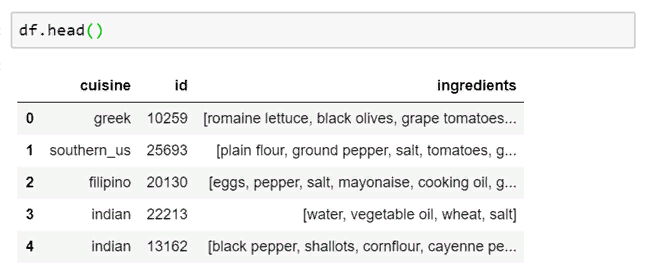
Для полноценной работы с данными нам необходимо иметь возможность хранить информацию о каждом ингредиенте в отдельном столбце. Созданием именно такой таблицы мы займёмся на следующем шаге.

# Задание 1
Какая часть набора данных была использована в качестве заголовков столбцов при создании датафрейма с помощью команды df = pd.DataFrame(recipes)?
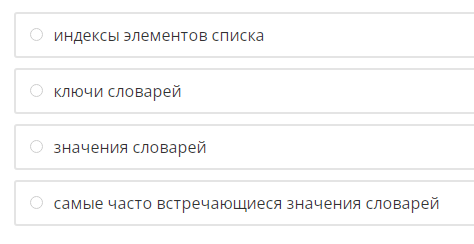

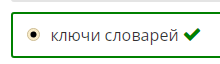

# Задание 2
Какая часть набора данных была использована в качестве индексов строк при создании датафрейма с помощью команды df = pd.DataFrame(recipes)?
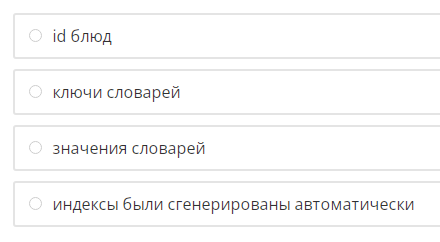

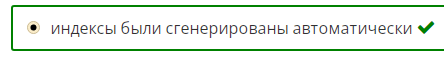

# Готовим данные для анализа
Давайте создадим на основе данных из JSON-файла датафрейм, пригодный для автоматизированного анализа данных. В качестве основы мы будем использовать датафрейм, созданный на предыдущем этапе. 

Прежде всего разберёмся со структурой нового датафрейма. В финальной версии в нашем датафрейме должны будут остаться столбцы, содержащие id блюда и название кухни; вместо списка ингредиентов мы включим в датафрейм столбец с данными о количестве ингредиентов, а оставшаяся часть датафрейма будет представлена столбцами, названия которых будут соответствовать названиям разных ингредиентов, а значения будут равны 1, если ингредиент присутствует в блюде, и 0,  если — отсутствует.

Общий вид датафрейма должен быть приблизительно следующим (возможен другой порядок столбцов с ингредиентами):

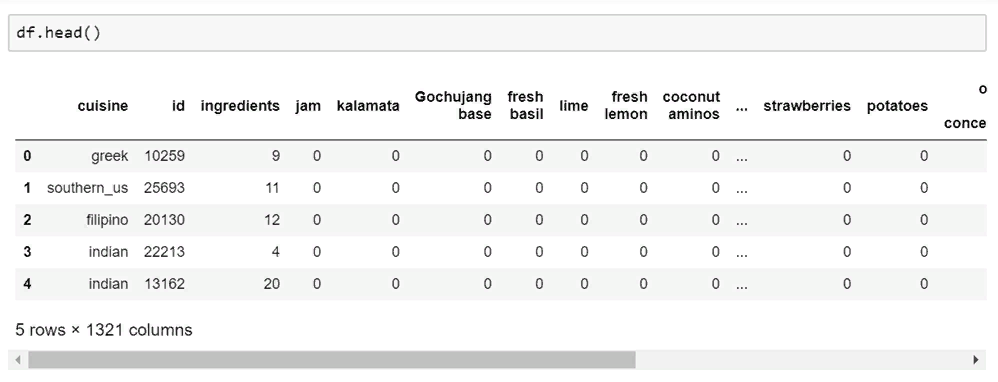

Работу над созданием датафрейма мы начнём с создания и заполнения столбцов, содержащих сведения о наличии или отсутствии каждого ингредиента в рецепте. Процесс заполнения  будем проводить в два этапа: 

1. Создадим функцию для заполнения значения в каждой ячейке. Функция будет проверять наличие конкретного ингредиента в столбце 'ingredients' для текущего блюда и возвращать 1, если ингредиент есть в рецепте, и 0, если он отсутствует.
2. Организуем цикл с параметром, в котором будем перебирать наименования всех ингредиентов. Для каждого ингредиента создадим в датафрейме столбец с соответствующим названием и заполним его единичками и нулями, применив к датафрейму, а точнее, к столбцу 'ingredients', функцию, созданную нами на предыдущем шаге.

Код функции, с помощью которой мы будем создавать новые столбцы и заполнять их значениями, могут выглядеть следующим образом:

In [25]:
def find_item(cell):
    if item in cell:
        return 1
    return 0

Теперь перейдём к созданию кода, в котором будут создаваться столбцы с информацией о наличии или отсутствии того или иного ингредиента в конкретном рецепте:

In [26]:
df = pd.DataFrame(recipes)
for item in ingredients:
    df[item] = df['ingredients'].apply(find_item)

В завершение изменим значение столбца ingredients, заполнив его данными о количестве ингредиентов в каждом рецепте:

In [27]:
df['ingredients'] = df['ingredients'].apply(len)

# Задание 3
Определите тип переменной cell, которую принимает на входе функция find_item:
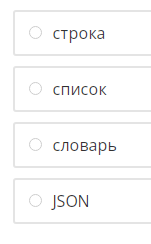

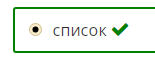

# Задание 4
Отметьте верные утверждения о переменной item, которая используется в коде функции find_item:
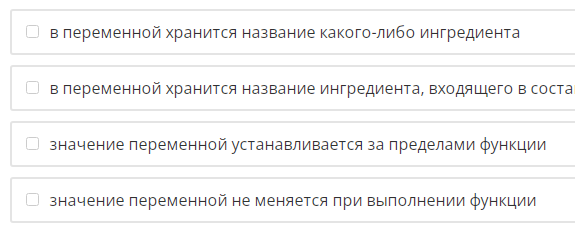

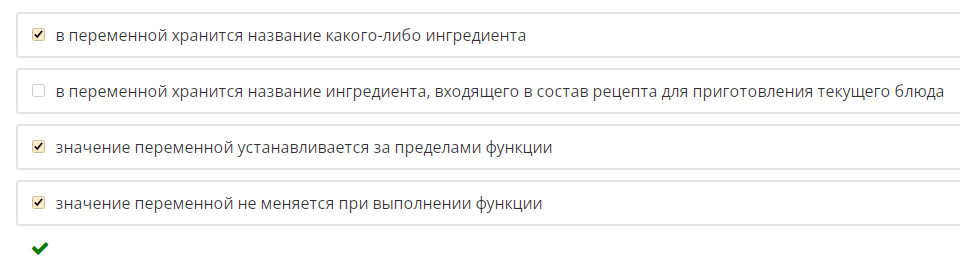

# Задание 5
Причина, по которой мы сначала заполнили столбцы с данными о наличии или отсутствии каждого ингредиента, а после этого заполнили столбец данными о количестве ингредиентов в рецепте:
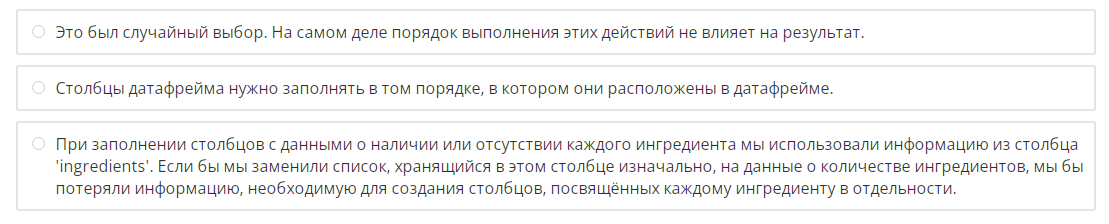

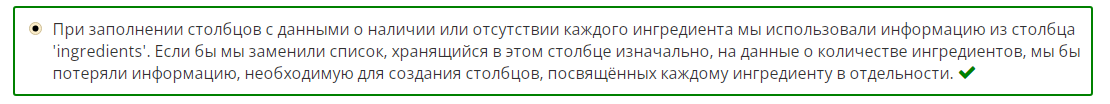

# Задание 6
Объедините все действия, начиная с чтения файла в JSON-формате (recipes.json) и заканчивая созданием итогового датафрейма, в единый код. Загрузите весь код в поле для ответа. Импорт библиотек в поле для ответа загружать не нужно.

Используйте множество (set) для хранения названий ингредиентов блюд.

Полученный в результате работы кода датафрейм должен иметь имя df.

In [28]:
with open('recipes.json') as f:
    recipes = json.load(f)
ingredients = set()  # создаём пустое множество для хранения уникальных значений кухонь
for recipe in recipes:  # начинаем перебор всех рецептов
    for ingredient in recipe['ingredients']:
        ingredients.add(ingredient)  # добавляем название типа кухни к множеству

food = {}  # создаём пустой словарь для хранения информации об ингредиентах
for item in ingredients:  # перебираем список ингредиентов
    food[item] = 0 # добавляем в словарь ключ, соответствующий очередному ингредиенту
for recipe in recipes:   # перебираем список рецептов
    for item in recipe['ingredients']:   # и список ингредиентов в каждом рецепте
        food[item] += 1   # увеличиваем значение нужного ключа в словаре на 1

def find_item(cell):
    if item in cell:
        return 1
    return 0

df = pd.DataFrame(recipes)
for item in ingredients:
    df[item] = df['ingredients'].apply(find_item)
df['ingredients'] = df['ingredients'].apply(len)

# Сохраняем датафрейм в CSV-файле
В случае, если вы планируете продолжать работать с датафреймом, созданным на основе данных, полученных в JSON-формате, полезно будет научиться сохранять созданный датафрейм в виде CSV-файла. Для выполнения этой операции в Pandas существует метод to_csv(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html?highlight=to_csv#pandas.DataFrame.to_csv):

In [29]:
df.to_csv('recipes.csv', index = False)

В качестве основного параметра мы указали имя файла, под которым нужно сохранить данные. Также мы установили значение параметра index равным False. Такая настройка позволит нам не сохранять индексы строк в виде отдельного столбца и в результате не загружать лишних данных при открытии файла методом read_csv.

# 13.5 Создание JSON-файла
### Из Pandas в JSON
В завершающей части этого блока мы решим обратную задачу и создадим JSON-файл из CSV-файла, который получили в конце предыдущего этапа. Итак, давайте начнём с чтения файла и создания датафрейма на его основе:

In [30]:
df = pd.read_csv('recipes.csv')

Теперь, используя только данные из этого файла, нам нужно в точности воссоздать структуру исходного JSON-файла. Как вы помните,  после десериализации данные представляли собой список, состоящий из словарей. В каждом словаре хранилась информация о рецепте одного блюда. Каждый словарь состоял из трёх пар "ключ-значение". Первая пара содержала название кухни, к которой относилось блюдо, вторая — id блюда, и третья — список ингредиентов.

Поскольку по условию мы не можем пользоваться предыдущими наработками, давайте начнём с создания списка, содержащего перечень ингредиентов, встречающихся в рецептах, а также списка, содержащего перечень id всех блюд. Эти списки в дальнейшем мы будем использовать для заполнения JSON-структуры.

# Задание 1
Напишите код для создания списка id всех блюд, представленных в датафрейме.  
Обратите внимание на следующие моменты:
- Тип структуры, в которой должны храниться id блюд — список (list).
- Имя переменной, в которой будет храниться список, — ids.
- Необходимо напрямую обратиться к столбцу id.
- Порядок id в списке не имеет значения.
- Код должен начинаться с чтения файла recipes.csv.

In [31]:
df = pd.read_csv('recipes.csv')
ids = list(df.id)

# Задание 2
Напишите код для создания списка ингредиентов всех блюд, представленных в датафрейме.  
Обратите внимание на следующие моменты:  
1. Тип структуры, в которой должны храниться названия ингредиентов блюд, — список (list).
2. Имя переменной, в которой будет храниться список, — ingredients.
3. Порядок ингредиентов в списке не имеет значения.
4. Код должен начинаться с чтения файла recipes.csv

Подсказка: поскольку названия ингредиентов используются как названия столбцов датафрейма, вы можете воспользоваться командой df.columns для получения перечня всех названий столбцов, после чего превратить перечень в список и извлечь из него нужные данные.

In [32]:
df = pd.read_csv('recipes.csv')
ingredients = list(df.columns[3:])

# Сохранение итоговой структуры
Разберём основную часть кода (пока без дополнительной функции). Как вы помните, после десериализации JSON-файла мы получили структуру, представляющую собой список, состоящий из словарей. Каждый словарь состоял из трёх пар "ключ-значение", при этом в качестве значений выступали целое число (id), строковая величина (тип кухни) и список строковых величин (перечень ингредиентов). Сейчас нам предстоит воссоздать эту структуру, извлекая данные из датафрейма.

Для хранения итоговой структуры создадим пустой список new_recipes. Также создадим списки для хранения id всех блюд и названий всех ингредиентов с помощью кода из предыдущих упражнений:

In [33]:
new_recipes = []
ids = list(df.id)# ваш код из упражнения 1
ingredients = list(df.columns[3:])# ваш код из упражнения 2

# Стратегия действий:

1. Организуем цикл с параметром, в котором будем перебирать элементы списка ids. В результате в процессе прохождения цикла параметр постепенно примет значение id каждого блюда.
2. На каждом шаге цикла создадим словарь, содержащий три пары "ключ-значение". Ключу "id" мы присвоим значение параметра цикла, ключу "cuisine" — значение соответствующей кухни, которое мы получим, применив фильтр по id к датафрейму df.
3. Для заполнения значения (списка) по ключу "ingredients" воспользуемся функцией, код которой обсудим чуть позже. Каждый созданный словарь мы будем добавлять к списку new_recipes:

In [34]:
# for current_id in ids:
#     cuisine = df[df['id'] == current_id]['cuisine'].iloc[0]
#     current_ingredients = make_list(df[df['id'] == current_id])
#     current_recipe = {'cuisine': cuisine, 'id': int(current_id), 'ingredients': current_ingredients}
#     new_recipes.append(current_recipe)

Итак, всё почти готово. Осталось создать код функции make_list, выполнить сериализацию и записать результат в файл.

# Задание 3
Напишите код функции make_list, которая принимает строку датафрейма df, содержащую данные об одном рецепте, и возвращает перечень ингредиентов этого блюда в виде списка.  
Обратите внимание на следующие моменты:
1. Тип структуры, которую должна вернуть функция в результате работы, — список (list).
2. В процессе работы функция должна обращаться к списку, в котором хранятся названия всех ингредиентов. Используйте имя переменной ingredients для списка.
3. Добавьте код для чтения файла recipes.csv и создания списка ingredients перед кодом функции.
4. Порядок ингредиентов в возвращаемом списке не имеет значения.

In [35]:
import pandas as pd

def make_list(row):
    return [i for i in ingredients if row[i].iloc[0] == 1]

df = pd.read_csv('recipes.csv')
ingredients = list(df.columns[3:])

В завершающей части данного блока мы выполним сериализацию списка new_recipes и запишем полученные данные в файл. Для сериализации мы будем использовать функцию dumps(), которой в качестве параметра передадим список new_recipes. Запись в файл осуществляется с помощью метода write(). Предварительно файл нужно будет открыть для записи с помощью функции open и параметра 'w':

In [36]:
new_recipes = json.dumps(new_recipes)
with open("new_recipes.json", "w") as write_file:
    write_file.write(new_recipes)

Оба действия можно совместить, если использовать метод dump():

In [37]:
with open("new_recipes.json", "w") as write_file:
    json.dump(new_recipes, write_file)

# 13.6 Формат XLS (Excel)
### Что такое Excel и зачем он нужен?
Excel-файлы — это по-простому таблицы с данными, которые имеют формат .xls и .xlsx. У вас уже есть опыт работы с форматом данных .csv, но этот формат проще Excel. Файл формата .csv это текстовый файл, в котором данные перечислены через запятую, но могут быть разделены и другими символами.

Файл формата .csv можно открыть любым текстовым редактором, с Excel иначе: он хранит не только табличные данные, но и может содержать изображения, графики, формулы, форматирование. Например, вы можете сделать столбец с температурой за окном за прошедшие 100 дней. Над столбцом можно записать «Температура» и выделить это слово **красным цветом**, написать его курсивом, рядом можно записать функцию, которая посчитает среднюю температуру, и построить график с изменением температуры.

Скорее всего, вы уже работали с этим форматом данных, используя инструменты, которые мы рассмотрим ниже. В этом блоке мы будем применять Python, чтобы извлекать данные из Excel-файлов и записывать туда данные.

### Инструменты для работы с Excel
Сейчас практически любой текстовый процессор может работать с Excel-файлами. Изначально мы работали с .xls файлами с помощью Microsoft Excel. Позже, начиная с версии Microsoft Excel 2007, появился более продвинутый формат .xlsx. Для нашей работы разницы между ними нет, это те же самые табличные документы.

### Инструменты для работы с Excel:
- Microsoft Excel.
- Google Sheets: редактирование файлов онлайн, создать новый документ можно с помощью sheets.new(https://docs.google.com/spreadsheets/d/1kbunHSzoWA_YtQbTqNhHE5411Kuqe3xrGnXqAYXFgs0/edit).
- OpenOffice(https://www.openoffice.org/) — открытый набор инструментов, в который входит приложение **Calc**, портирован на многие платформы.
- Pandas: немного непривычно, но можно работать.

В данном блоке мы будем работать именно с Pandas: научимся читать и изменять Excel-файлы. Преимущество этого инструмента в том, что он позволяет работать со множеством однотипных документов и автоматизировать обработку. Pandas подходит для тех, кто умеет программировать, но если вы не умеете, то можно автоматизировать работу с табличными данными с помощью Zapier(https://zapier.com/) и IFTTT(https://ifttt.com/).

# Задание 1
Что может храниться в xls/xlsx файле?
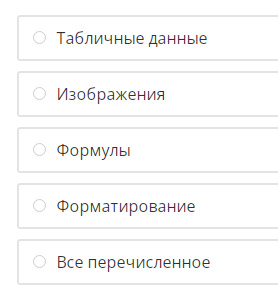

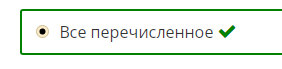

# Задание 2
Какие инструменты можно использовать для работы с Excel-файлами, если вы хотите автоматизировать работу, но не хотите программировать?
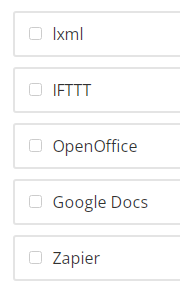

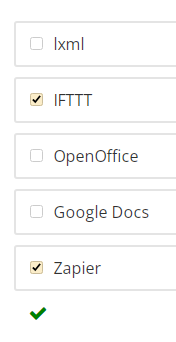

# 13.7 Чтение Excel-файла
Чтение Excel-файла  
Для начала поработаем с файлом Fig3-1.xls (https://docviewer.yandex.ru/view/192452314/?*=e9dTlk05Fjvo0W1EfnI3IyyMMFF7InVybCI6InlhLWJyb3dzZXI6Ly80RFQxdVhFUFJySlJYbFVGb2V3cnVBVjF5QTU4Y1h4RzdwSzhKa25RVTVDNFhyekEydEY0blRvWHE5bVVzTldObFhVN3poa0NZRVd1ZlpVeEpXSmZ0ZWIwMmtYdTRZd0xYT3Q4RFF0cm9CemZkVlREaVRhUlp4cWZLSU5fOUpQbzYyZW96MEVFZ25WczY2ejFvWmlKSHc9PT9zaWduPXFDVGRMWHFOd2VBZnVRU0lKYUtUZUY3aTZfNHJOR05EMnpfa1pvVktlMDQ9IiwidGl0bGUiOiJGaWczLTEueGxzIiwibm9pZnJhbWUiOmZhbHNlLCJ1aWQiOiIxOTI0NTIzMTQiLCJ0cyI6MTYzMzUxMzU2NTM1OCwieXUiOiIzOTY0OTk2MDQxNjMxMjcyMzc5In0%3D). В Pandas есть метод, с помощью которого можно прочитать файл:

In [38]:
data = pd.read_excel('Fig3-1.xls')  

В данном случае будет считан только первый лист файла содержащий табличные данные (как считать все листы содержащие табличные данные в файле будет рассмотрено ниже).

В этот метод можно передать параметр header=None, чтобы не считать первую строчку за названия столбцов. Посмотрим, что будет, если передать такой параметр и открыть данные:

In [39]:
data = pd.read_excel('Fig3-1.xls', header=None)  
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,"U.S. Home Price and Related data, for Figure 3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,See the book for description of data.,NaN,NaN,NaN,"Update Nominal Home Price Index, Click Additio...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"Monthly data from January 1953 for prices, all...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Nominal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Real,NaN,Real,NaN,NaN,NaN,NaN,Home,NaN,NaN,Nominal,NaN,NaN,Consumer,NaN,NaN,NaN,NaN
4,NaN,Home,NaN,Building,U.S.,NaN,NaN,NaN,Price,HPI,NaN,Building,NaN,NaN,Price,CPI Annual&,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,2018.791667,174.056034,NaN,NaN,NaN,NaN,NaN,2018.791667,205.709,S&P/CoreLogic/Case-Shiller,NaN,NaN,NaN,2018.791667,252.885,BLS,NaN,NaN,NaN
860,2018.875,174.438912,NaN,NaN,NaN,NaN,NaN,2018.875,205.471,S&P/CoreLogic/Case-Shiller,NaN,NaN,NaN,2018.875,252.038,BLS,NaN,NaN,NaN
861,2018.958333,174.658876,NaN,NaN,NaN,NaN,NaN,2018.958333,205.073,S&P/CoreLogic/Case-Shiller,NaN,NaN,NaN,2018.958333,251.233,BLS,NaN,NaN,NaN
862,2019.041667,174.01623,NaN,NaN,NaN,NaN,NaN,2019.041667,204.708,S&P/CoreLogic/Case-Shiller,NaN,NaN,NaN,2019.041667,251.712,BLS,NaN,NaN,NaN


Мы видим, что файл загрузился и выглядит, как обычный pandas.DataFrame. Pandas автоматически обрабатывает данные в этом формате при загрузке. При этом получается много пропусков (NaN), это те места, где в ячейках ничего не было написано. Посмотрим, как этот лист выглядит, если посмотреть на него стандартными средствами (не через Pandas):
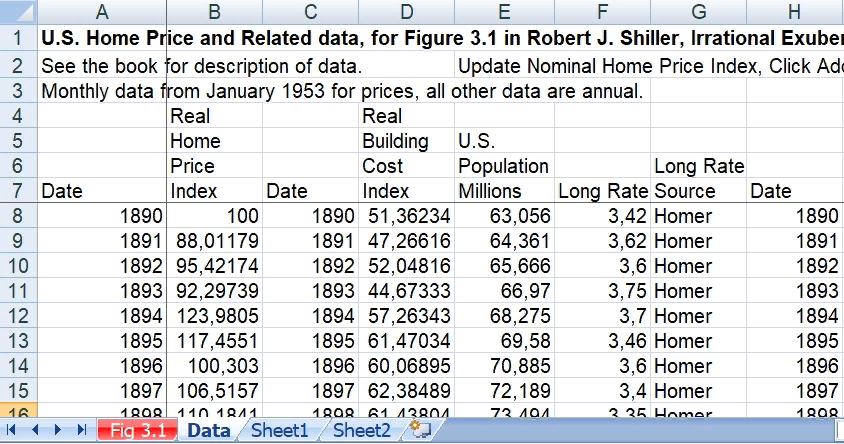
При загрузке потерялось форматирование (жирные символы): Pandas не умеет работать с данными, содержащими форматирование. Но при сохранении файла после обработки мы сможем добавить форматирование. Если Pandas отображает не все столбцы при выводе данных, вы можете воспользоваться следующим методом, чтобы выводить все столбцы:

In [40]:
pd.set_option('display.max_columns', None)

Это просто небольшая настройка Pandas.  Вы можете применить её сразу после импортирования библиотеки, и её действие будет распространяться на весь код.

### Основные параметры при чтении
Параметры, которые можно передавать методу pandas.read_excel():

1. io — первый параметр, в который мы передаём адрес файла, который хотим прочитать. Кроме адреса на диске, можно передавать адрес в интернете или специальный объект ExcelFile, о котором мы поговорим позже.
2. sheet_name — ссылка на лист в Excel-файле. Возможные варианты значения данного параметра:
- 0 — значение по умолчанию, означает, что загружаем первую страницу (первый лист);
- 'Sheet1' — можно передать название листа; обычно страницы называются 'SheetX', где X — номер листа, но могут использоваться и другие названия; 
- [0, 1, 'Sheet3'] — список, содержащий номера или названия листов; в таком случае Pandas вернёт словарь, в котором ключами будут номера или названия листов, а значениями — их содержимое в виде DataFrame;
- None — если передать такое значение, то Pandas прочитает все листы и вернёт их в виде словаря, как в предыдущем пункте.
3. na_values — список значений, которые будут считаться пропусками. Здесь всё точно так же, как при чтении .csv файла: ‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’

# Задание 1
Сколько строк содержится в файле, с которым мы будем работать?  
Для получения ответа на вопрос прочитайте файл Fig3-1.xls. Явно укажите, что у файла нет заголовка (header). Запишите ниже, сколько строк содержится в полученном датафрейме.

In [41]:
len(data.index)

864

# Чтение с помощью ExcelFile
Еще один способ прочитать Excel-файл — использовать pd.ExcelFile. Это специальный объект, которому на вход можно передать путь к файлу. Сначала мы создаем объект ExcelFile и передаём ему путь к файлу, после этого можем работать с файлом, считывая содержимое.

In [42]:
data_file = pd.ExcelFile('./Fig3-1.xls')  
data = pd.read_excel(data_file, header=None)

Когда это может пригодиться? Например, если мы принимаем файл в одном месте программы, а используем в другом. Это может оптимизировать затрачиваемое время, если мы не знаем заранее, когда будем использовать содержимое файла. Ещё один случай:   в файле есть несколько страниц и нам не нужны все эти страницы сразу. Если мы будем читать страницы порознь с помощью read_excel и передавать в этот метод путь к файлу, мы будем каждый раз загружать этот файл в память. Когда данных много, это заполнит вашу оперативную память. В случае с ExcelFile мы прочитаем файл один раз и потом будем только подгружать необходимые страницы.

С ExcelFile можно работать с помощью контекстного менеджера:

In [43]:
with pd.ExcelFile('Fig3-1.xls') as xls:
    data['Sheet1'] = pd.read_excel(xls, 'Sheet1', na_values=['NA'])
    data['Sheet2'] = pd.read_excel(xls, 'Sheet2')

ValueError: Wrong number of items passed 2, placement implies 1

Если на первой странице мы хотим считать пропусками только ячейки со значением 'NA', а на второй  – любые похожие на пропуски значения (они описаны выше), то ExcelFile позволит проявить такую гибкость при чтении данных с разных листов.

Если мы просто хотим прочитать два листа из Excel-файла, то этот код:

In [ ]:
with pd.ExcelFile('Fig3-1.xls') as xls:  
    data['Sheet1'] = pd.read_excel(xls, 'Sheet1')  
    data['Sheet2'] = pd.read_excel(xls, 'Sheet2')

И этот код:

In [ ]:
data = pd.read_excel('Fig3-1.xls', ['Sheet1', 'Sheet2'])  

Оба кода дадут нам одинаковый результат как по скорости работы, так и по возвращаемому результату.

# Задание 2
Как может пригодиться pd.ExcelFile?
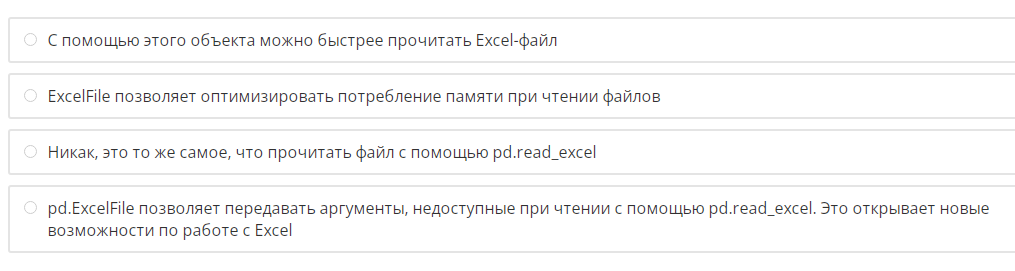

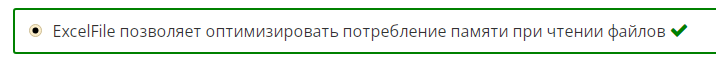

# 13.8 Продвинутое чтение Excel-файла
### Чтение по ссылке
Рассмотрим ещё один способ, с помощью которого можно прочитать данные. В прошлой секции вы скачали данные, которые мы специально загрузили на учебный портал. На самом деле ни вам, ни нам не обязательно было сохранять эти данные к себе на компьютер: ссылку на данные можно было передать прямо в метод read_excel:

In [ ]:
data = pd.read_excel('http://www.econ.yale.edu/~shiller/data/Fig3-1.xls', header=None)  

Если вы выполните этот код, результат будет точно такой же, как раньше. Подобный подход можно использовать и при работе с ExcelFile. Зачем это может пригодиться? Например, у вас на сервере есть скрипт, который генерирует отчеты в формате Excel и возвращает вам ссылки на них. Можно сохранять данные на диск, затем читать их в Pandas. А можно сразу прочитать их по ссылке, сэкономив немного времени, строчек кода и, возможно, места на диске.

До этого вы работали с данными, в которых находились обычные таблицы. Что вы делали? Загружали эти таблицы и дальше работали с ними. Однако часто приходится работать с таблицами, не имеющими настолько чёткой структуры или содержащих много дополнительной, значимой для нас информации: номер документа, дата его подписания, фамилия сотрудника, чья подпись стоит на документе. 

Давайте рассмотрим подходы к решению таких задач на примере. Скачайте файл nakladnaya.xls(https://docviewer.yandex.ru/view/192452314/?*=%2BDrlz90MmG7%2BZ21BOtbtBaoKAk17InVybCI6InlhLWJyb3dzZXI6Ly80RFQxdVhFUFJySlJYbFVGb2V3cnVBUDBweUVRUmVjRjFCNnNaLXNQV2tIUVp3ekF2VmU1TktmOHJ2YVJSRzFUNnlfdW1RZnJvVlRjZWpPTHdwVWFHRmwxdUxDY3Nra0htX0lKbWtvNkk4Y3dic2lpamwxVWdoTjk0UE5FNldMOWd0Nnpwbnh6RDFHR3d4YVRyZFRpamc9PT9zaWduPTVlNlJnZDRNRGEyNEJqN3NOR1NuYmFKQkZGdEwyYUJtWFViaWpwanVLRms9IiwidGl0bGUiOiJuYWtsYWRuYXlhLnhscyIsIm5vaWZyYW1lIjpmYWxzZSwidWlkIjoiMTkyNDUyMzE0IiwidHMiOjE2MzM1MTU2MDgzMzYsInl1IjoiMzk2NDk5NjA0MTYzMTI3MjM3OSJ9). Посмотрим на него стандартными средствами:
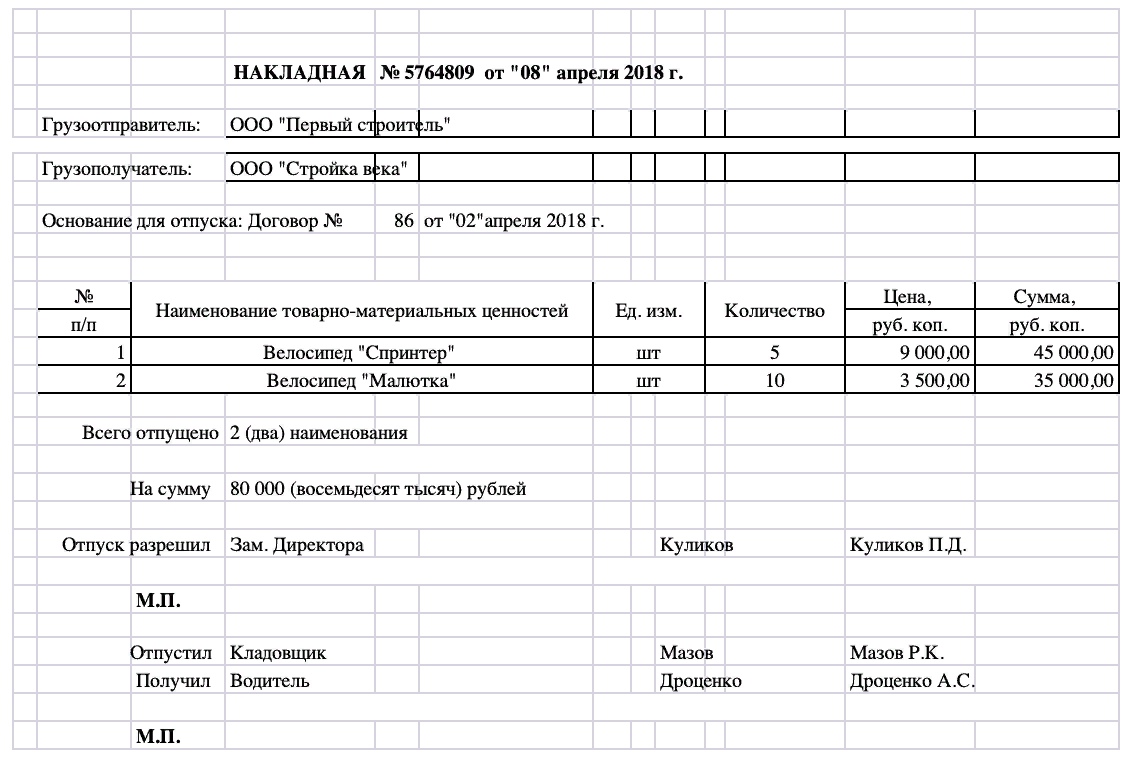
Что нам может понадобиться в этих данных? Во-первых, это названия компаний, имена людей, номер и дата накладной. Во-вторых, табличные данные в центре файла — информация об объектах, которые были куплены.

### Пустые строки
Если мы посмотрим на то, как выглядит файл, то увидим, что первые две строчки — пустые, и при чтении файла их желательно пропустить. Для этого можно передать в функцию read_excel дополнительный параметр — skiprows. В качестве значения параметра укажем количество строк, которые надо пропустить при чтении:

In [ ]:
# data = pd.read_excel("./nakladnaya.xls", header=None, skiprows=X)

Здесь вместо X нужно написать количество строк, которые мы хотим пропустить. Если мы хотим пропустить строки не в начале, а в конце, то нужно использовать параметр skipfooter, он работает точно так же.

# Задание 1
Сколько строк нужно пропустить в начале, чтобы в первой строке получить номер и дату накладной?

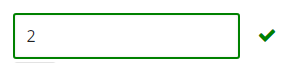

# Задание 2
Можно заметить, что многие строки датафрейма data полностью состоят из пропусков. Используйте изученный ранее метод pandas, чтобы убрать все такие строки. Запишите ниже, сколько строк осталось.
Чтобы убирать только те строки, в которых все значения являются пропусками, нужно использовать параметр how и передавать в него значение all.

In [ ]:
data = pd.read_excel("./nakladnaya.xls", header=None, skiprows=2)
data = data.dropna(how='all')
len(data)

# Ручная работа
Теперь начинается ручная работа. Предобработка данных занимает до 80% работы, часто приходится пристально изучать данные и искать способы автоматизировать процесс в надежде, что формат данных внезапно не поменяется.

С таблицами можно работать, как с текстовыми данными, и использовать алгоритмы машинного обучения, чтобы автоматически определять, как поменялся формат данных и автоматически перестраивать правила извлечения данных. Тем не менее, в этом модуле мы не используем машинное обучение, поэтому извлечём данные вручную.

# Задание 3
Какой код поможет узнать номер накладной?
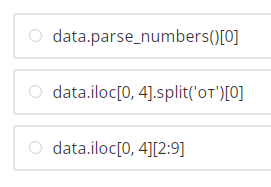

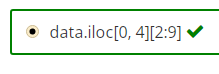

# Задание 4
Напишите, сколько столбцов, содержащих значимые данные, содержится в таблице товаров. Например, 23. Не забудьте про столбец с номером товара.

In [ ]:
len(data.iloc[4].dropna())

# Задание 5
Выберите те варианты, которые позволят нам выделить таблицу товаров из датафрейма data, сразу после чтения из файла и удаления строк полностью состоящих из пропусков. Заголовок таблицы товаров нам тоже не нужен.
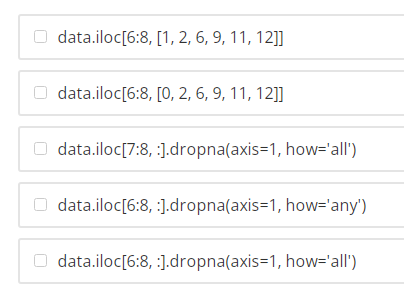

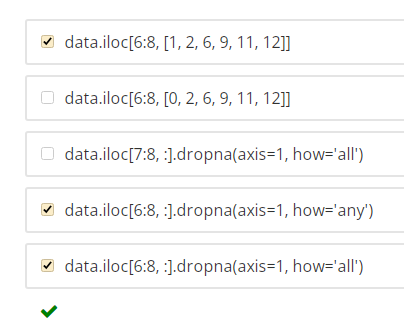

# 13.9 Запись в Excel-файл
### Как записать файл
В прошлом блоке вы смогли получить таблицу, содержащую данные о товарах (велосипедах). Запишите ее в объект table. Теперь посмотрим, как мы можем записать ее обратно в чистый Excel файл. 

In [ ]:
table = data.iloc[6:8, :].dropna(axis=1, how='all')

Вспомним, что мы делали бы в случае .csv:

In [ ]:
table.to_csv("table.csv")

Как сохранить эту таблицу в Excel файл:

In [ ]:
table.to_excel("table.xls")

Если мы сохраним таблицу именно так, мы сохраним ее индекс, и в данных будет находиться лишний столбец. Чтобы не сохранять индекс, можно в метод to_excel() передать параметр index=False.

Ранее вы познакомились с еще одним способом прочитать Excel файл с помощью ExcelFile. Теперь вы увидите схожий инструмент для записи — ExcelWriter. Вот как записать данные в файл с его помощью:

In [ ]:
writer = pd.ExcelWriter('test.xlsx')  
table.to_excel(writer, index=False, sheet_name='Таблица')  
writer.save()

### Что здесь произошло?

Во-первых, мы все равно использовали метод to_excel(), но вместо пути к будущему файлу передали объект типа ExcelWriter, который создали на первой строке. Во-вторых, мы вызвали метод save() у объекта ExcelWriter. До этого момента сохранение не было завершено, и мы могли сделать еще некоторые действия. Какие? Давайте узнаем.

### Добавим форматирование
Как мы узнали в самом начале, Excel-файлы поддерживают форматирование текста. С помощью pandas мы можем добавлять форматирование в Excel-файлы, используя ExcelWriter. Если мы хотим добавить форматирование, нужно выбрать объект workbook, с помощью которого мы будем добавлять, например, выделение текста жирным. Кроме этого, нужно выбрать нужную страницу:

In [ ]:
workbook = writer.book  
worksheet = writer.sheets['Таблица']

Теперь давайте выделим цену и сумму жирным, а наименование — красным цветом:

In [ ]:
money_fmt = workbook.add_format({'bold': True})  
name_fmt = workbook.add_format({'color': 'red'})  
  
worksheet.set_column('E:F', 20, money_fmt)  
worksheet.set_column(1, 1, 20, name_fmt)

# Что здесь произошло?

1. Мы создали два объекта с описанием двух типов форматирования:
- для оформления цены и стоимости — полужирное начертание;
- для оформления наименований товаров — красный цвет текста.  

2. Связали описанные типы форматирования с определёнными ячейками листа "Таблица": 
- для столбцов E-F выбрали форматирование money_fmt (применяется для оформления цены и стоимости); 
- для столбца 1, который отвечает за наименование, выбрали форматирование name_fmt.

Для выбора нужных столбцов при задании параметров форматирования мы использовали два способа. Один - из них — с помощью буквенных обозначений. Это стандартный способ обращаться к столбцам в Excel. Второй — с помощью номера столбца.

Важно запомнить, что при работе с Excel при задании диапазона значений значения указываются включительно. Именно поэтому мы выбрали во втором случае применение форматирования от столбца 1 до столбца 1.

Ещё одна вещь, на которую нужно обратить внимание: число 20 среди параметров метода set_column(). Этот параметр означает ширину столбца. Например, если мы передадим число 300, столбец получится очень широким, вы можете убедиться в этом сами.

### Какие еще параметры можно попробовать:
- border отвечает за границы столбца и может быть равен True или False; 
- align отвечает за расположение данных внутри ячеек, например, center для настройки выравнивания по центру; 
- fg_color отвечает за цвет фона, например, 'green', хотя можно передать и шестнадцатеричное значение, например, '#D7E4BC'.

Для того, чтобы исполнить код, нужно изменить engine для ExcelWriter:

In [ ]:
writer = pd.ExcelWriter('test.xlsx', engine='xlsxwriter')

Предварительно установите ExcelWriter:

In [ ]:
# %pip install xlsxwriter

# Задание 1
Можем ли мы применять разное форматирование к разным страницам, применяя его к разным worksheet?
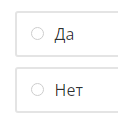

# Задание 2
Когда мы применяем форматирование к диапазону столбцов, оно применяется включительно с последним столбцом или нет?
Например, если диапазон 'A:F', применится ли форматирование к столбцу F?
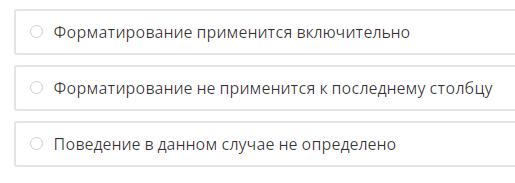

# Задание 3
Как мы можем применять форматирование в Excel-файлах?
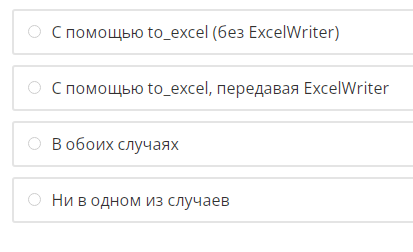